# Step By Step Machine Learning 

In this colaboratory notebook, you learn to work with python and machine learning models. and how to step by step develop machine learning project using Python.




### Import libraries
We need to import  all the modules, functions  before using them

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Load Dataset

**Iris Data**

We want to use some data sets. 
We get start with the Iris dataset which usually is used to teach the fundamentals of machine learning algorithms.

Data set has been used by almost every data science beginner. This data set is the machine learning practitioner’s equivalent of “Hello, World!”.

Our goal is to train a machine learning model to correctly predict the flower species from the measured attributes.


**species**:

*   Iris Setosa
*   Iris Versicolor
*   Iris Virginica


**Variable**

Each species of flower is quantified via four numerical attributes, all measured in centimeters:

*   Sepal length
*   Sepal width
*   Petal length
*   Petal width



In [4]:
url = "https://raw.githubusercontent.com/FarnooshKh/Machine-Learning/master/Data/iris.csv"
dataset = pd.read_csv(url,index_col=0)

In [5]:
# from sklearn import  datasets
# import some data to play with
# iris = datasets.load_iris()

### Summarize the Dataset



*   Dimensions of the dataset.
*   Describtion of the dataset.

  Statistical summary of all attributes.
  
*   Class Distribution



In [6]:
# shape
print(dataset.shape)
iris_data = dataset.iloc[:,:-2]
iris_target = dataset['target']
dataset.head(5)

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0.0,Iris-setosa
1,4.9,3.0,1.4,0.2,0.0,Iris-setosa
2,4.7,3.2,1.3,0.2,0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,0.0,Iris-setosa
4,5.0,3.6,1.4,0.2,0.0,Iris-setosa


**Statistical Summary**

In [7]:
# descriptions

print(iris_data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [8]:
iris_data.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [9]:
# class distribution
print(dataset.groupby('class').size())
#dataset.groupby('class').describe()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [10]:
# datatype
dataset.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
class                 object
dtype: object

### Data Visualization





*   Univariate plots 

  Better understanding of each attribute.

  Plots of each individual variable.
  
  This gives us a much clearer idea of the distribution of the input attributes. For example if variable have Gaussian distribution then we can choose algorithms that use this assumption.
   
*   Multivariate plots 

  Better understand the relationships between attributes.
  
  Interactions between the variables.
  
  Correlation between variables








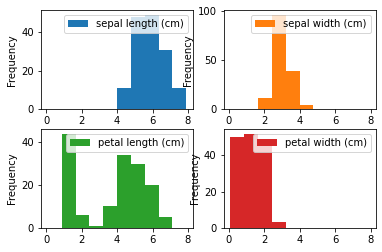

In [11]:
# two different ways of plots 
#dataset.iloc[:,:-2].hist(bins=20,figsize=(9,7),grid=False)
iris_data.plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

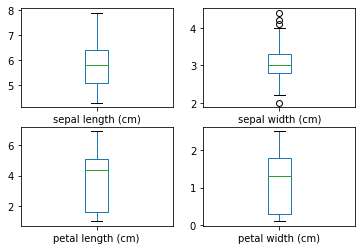

In [12]:
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


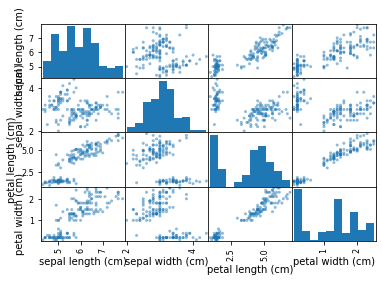

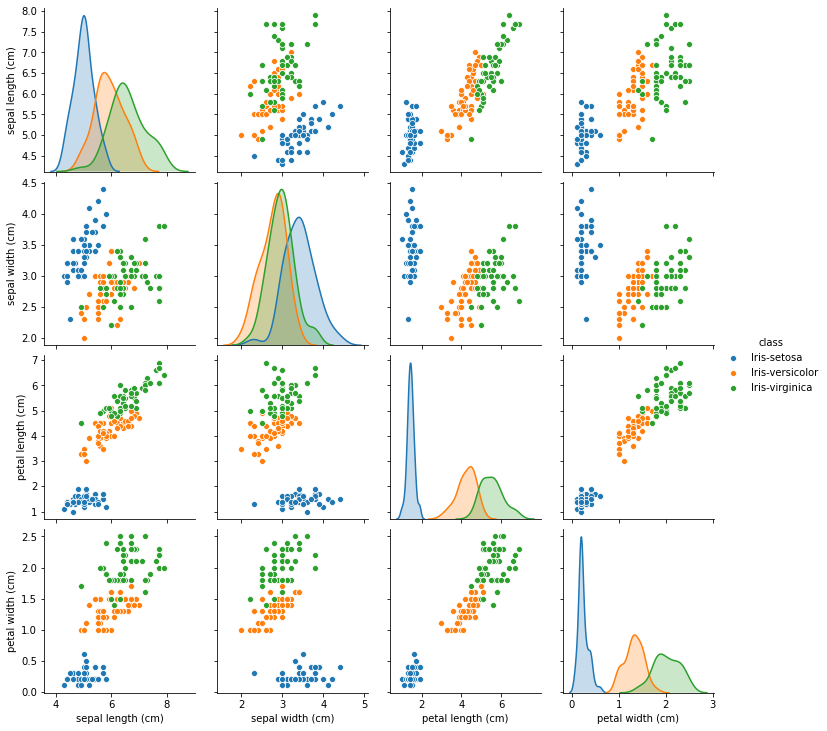

In [14]:
from pandas.plotting import scatter_matrix
import seaborn as sns
# scatter plot matrix
scatter_matrix(iris_data)
plt.show()


sns.pairplot(dataset.drop("target", axis=1), kind="scatter", hue="class")
plt.show()


## Splitting data to training and testing sets

If we use one of our labeled fruit examples in the data that we use to train the classifier, we can't also use that same irish data as a test sample to also evaluate the classifier.

The machine learning Algorithm needs to work well on any input sample (Training Set), any new pieces of data that we might see in the future(Test Set).



To investigate performance of our model, we need to split the data to training and testing sets(validation set). This will help us to check potential overfitting in our model training.

**random_state** as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, dataset['class'], test_size=0.30, random_state=5)


In [17]:
print(f'train: {X_train.size}')
print(f'test: {X_test.size}')

train: 420
test: 180


# Building classification models




## K nearest neighbour(KNN)
K nearest neighbour uses a distance metric like Euclidean distance to identity similarity of target data point (sample) in test or validation set to the data points (samples) in the trainign set. Then based on the user specified k, it finds the k closest points (samples) to the target data point. Afterward, it chooses the most frequent label among the k closes points (majority voting) as the class label of the target sample. The class labels can be also assigned based on weighted voting of the k closest data points to the data point.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier
knn = KNeighborsClassifier(n_neighbors=2, weights='distance' )

# Fitting the model with the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [19]:
y_pred = knn.predict(X_test)
print(y_pred)
print(y_test.values)


['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']
['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 

# Performance measure

To assess performance of the machine learning model, we can use the following measure of the performance of the model:



* **precision** is also referred to as positive predictive value (PPV)

$${\displaystyle {\text{Precision}}=\text{True positive rate} = {\frac {tp}{tp+fp}}\,}$$

* **Recall** in this context is also referred to as the true positive rate or sensitivity




$${\displaystyle {\text{Recall}}={\frac {tp}{tp+fn}}\,} $$

 

* **specificity** True negative rate



$${\displaystyle {\text{True negative rate}}={\frac {tn}{tn+fp}}\,}$$

* **Accuracy**: This measure gives you a sense of performance for all the classes together as follows:

$$ {\displaystyle {\text{Accuracy}}={\frac {tp+tn}{tp+tn+fp+fn}}\,}$$


\begin{equation*} Accuracy=\frac{Number\:of\:correct\:predictions}{(Total\:number\:of\:data\:points (samples))} \end{equation*}

$${\displaystyle {\text{Balanced Accuracy}}={\frac {TPR+TNR}{2}}\,}$$

* **Confusion matrix (or error matrix)**: True and false classification of the samples in all the classes can be shown in a matrix which is called confusion (or error) matrix. The columns are usually considered as the predicted classes and rows as actual classes. Hence, the diagonal elements of the matrix will be the total number of true classifcation in each class. 


In [20]:
from sklearn import metrics

print("Confusion matrix of the predictions:\n", metrics.confusion_matrix(y_test, y_pred))

print("accuracy of the predictions:", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred, average=None))


Confusion matrix of the predictions:
 [[15  0  0]
 [ 0 14  2]
 [ 0  1 13]]
accuracy of the predictions: 0.9333333333333333
precision [1.         0.93333333 0.86666667]


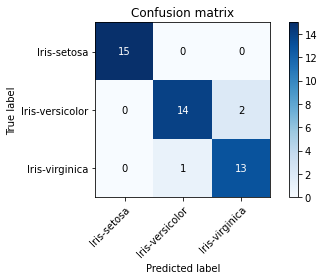

In [21]:


from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
 
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes= dataset['class'].unique(),
                      title='Confusion matrix')

plt.show()


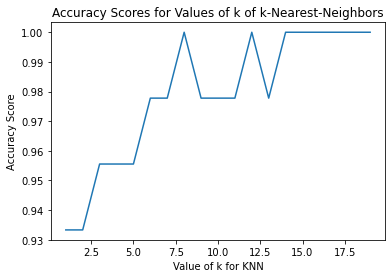

In [22]:
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

E:\Python\PythonInstall\envs\new\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
E:\Python\PythonInstall\envs\new\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


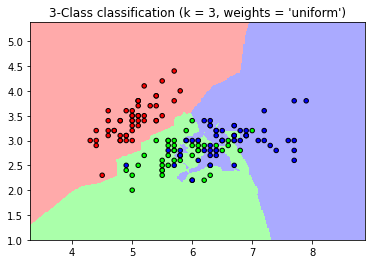

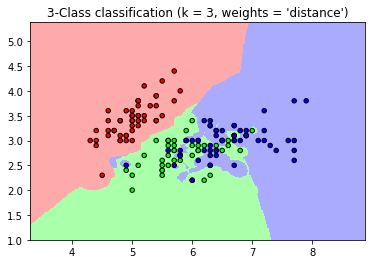

In [23]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()